<a href="https://colab.research.google.com/github/kleczekr/reddit_nltk/blob/master/reddit_nltk_from_lds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introductory employment of NLTK for Reddit

The code below is entirely adapted from the article: "Sentiment Analysis on Reddit News Headlines with Python’s Natural Language Toolkit (NLTK)" from the Learn Data Science platform (read it [here](https://www.learndatasci.com/tutorials/sentiment-analysis-reddit-headlines-pythons-nltk/)). Some examples were altered.

In [1]:
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#!pip install praw

     |████████████████████████████████| 153kB 4.5MB/s 
     |████████████████████████████████| 204kB 8.8MB/s 


In [0]:
import praw

reddit = praw.Reddit(client_id='clientid',
                     client_secret='clientsecret',
                     user_agent='useragent')

In [0]:
headlines = []

In [13]:
for submission in reddit.subreddit('Showerthoughts').new(limit=None):
    headlines.append(submission.title)
    display.clear_output()
    print(len(headlines))

998


In [0]:
from nltk.tokenize import word_tokenize, RegexpTokenizer

In [0]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

In [0]:
tokenizer = RegexpTokenizer(r'\w+')

In [0]:
def process_text(headlines):
    tokens = []
    for line in headlines:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    
    return tokens

In [0]:
tokens = process_text(headlines)
freq = nltk.FreqDist(tokens)

In [27]:
freq.most_common(20)

[('people', 103),
 ('probably', 80),
 ('life', 53),
 ('would', 53),
 ('like', 46),
 ('one', 45),
 ('someone', 45),
 ('could', 42),
 ('world', 40),
 ('get', 39),
 ('never', 37),
 ('actually', 31),
 ('something', 30),
 ('see', 29),
 ('make', 28),
 ('person', 27),
 ('really', 27),
 ('us', 26),
 ('things', 26),
 ('every', 25)]

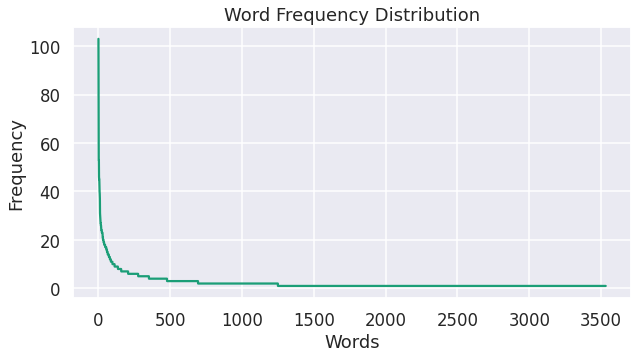

In [28]:
y_val = [x[1] for x in freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency Distribution')
plt.show()